<a href="https://colab.research.google.com/github/nizarmahi/Machine-Learning-24-25/blob/main/Week4/Week4P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

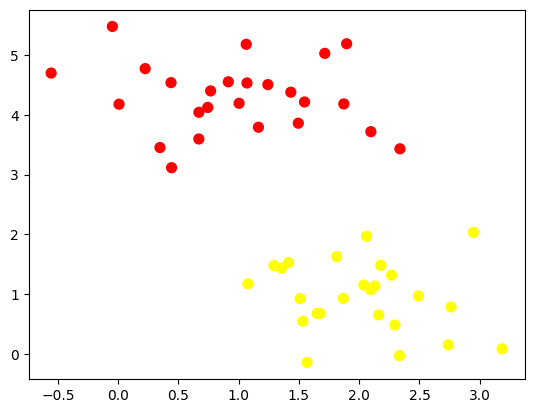

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

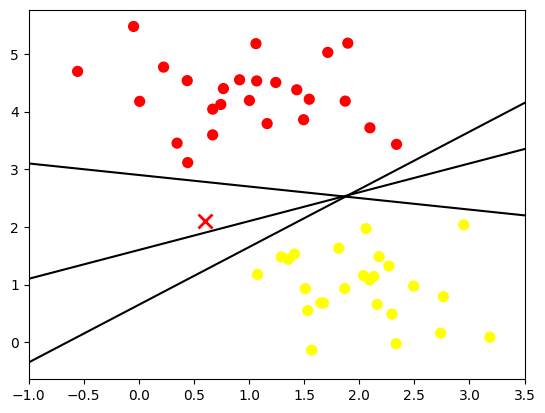

In [2]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

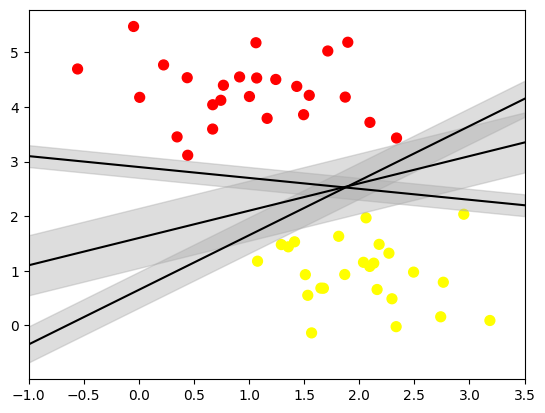

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [4]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

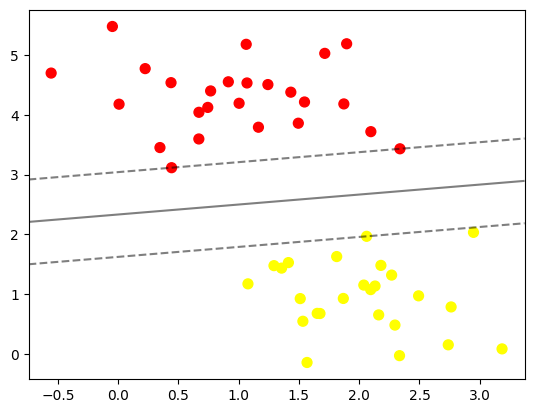

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [8]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

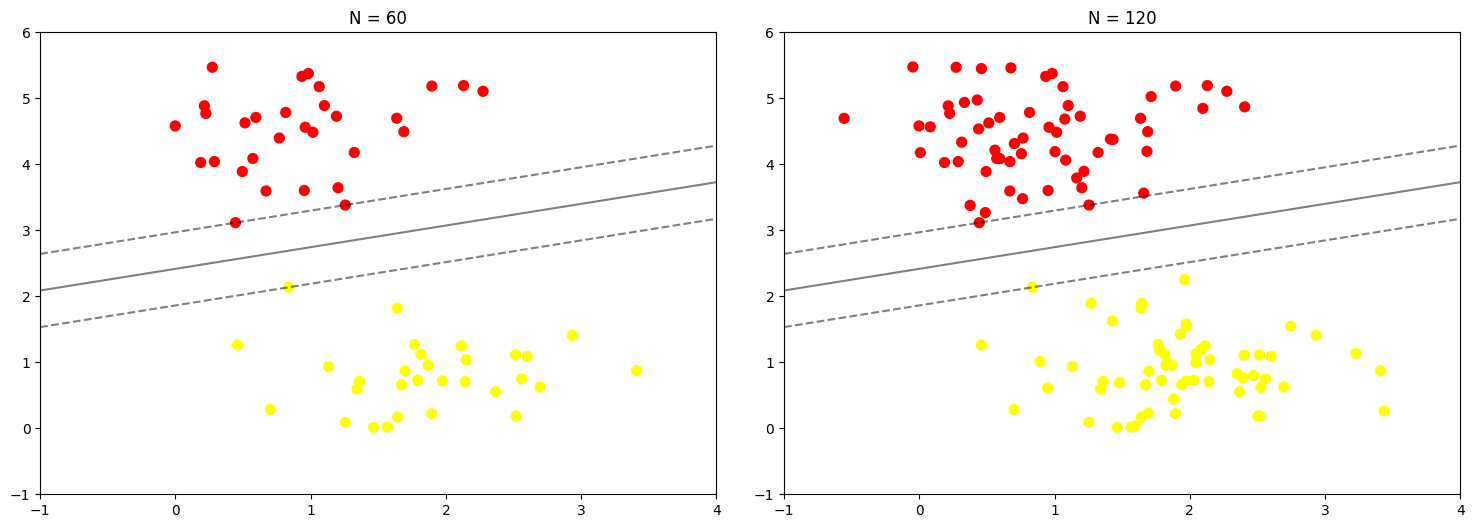

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

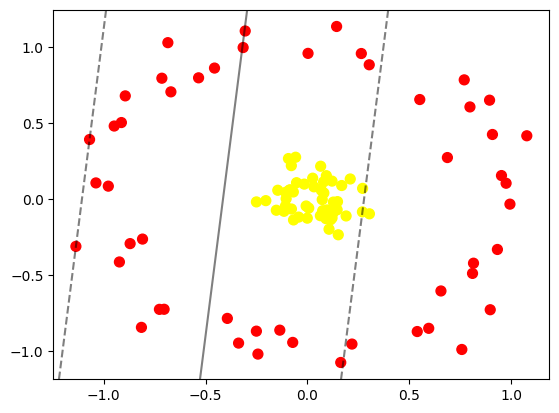

In [10]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 9.27677402e-02,  1.52608393e-01],
       [-6.84316992e-02, -1.38637775e-01],
       [-7.03844712e-01, -7.26640162e-01],
       [-1.06980346e-01,  4.32836280e-02],
       [ 2.64394990e-01,  9.56686421e-01],
       [ 9.52576891e-01,  1.53440291e-01],
       [ 7.57903731e-01, -9.91256739e-01],
       [ 6.87076265e-01,  2.71993842e-01],
       [-1.35760161e-01, -8.64122304e-01],
       [-3.05623093e-01,  1.10504636e+00],
       [ 1.13758484e-01, -1.36959865e-01],
       [-8.99778967e-02,  5.61228099e-02],
       [ 3.04192835e-01, -9.82813576e-02],
       [-9.32247153e-02,  2.65355320e-01],
       [ 1.07692752e+00,  4.15306567e-01],
       [ 5.39003001e-01, -8.73205193e-01],
       [-6.48912318e-03, -4.68693511e-02],
       [ 7.97783094e-01,  6.05119931e-01],
       [ 2.69885673e-01, -8.55589491e-02],
       [ 7.46945211e-02, -7.79196082e-02],
       [-8.09780418e-01, -2.64652438e-01],
       [ 3.03312336e-01,  8.82588721e-01],
       [ 2.70739881e-01,  6.90164844e-02],
       [ 9.75255319e-01,  1.02911789e-01],
       [-4.56330315e-01,  8.60956773e-01],
       [ 2.10045608e-01,  1.30953970e-01],
       [-5.34559244e-01,  7.96758494e-01],
       [-2.50602475e-01, -1.99603150e-02],
       [ 1.05968484e-01, -1.99823285e-01],
       [ 9.10983468e-02, -1.30314423e-01],
       [-7.24017649e-02, -9.44782997e-01],
       [ 1.25246982e-01, -9.23345115e-02],
       [-1.04581730e-01,  1.03061611e-03],
       [ 9.08210947e-01,  4.23793878e-01],
       [-6.70488265e-01,  7.04413981e-01],
       [ 2.80178270e-03,  9.57680646e-01],
       [-5.36296507e-02,  1.06474850e-01],
       [-1.06981169e+00,  3.90695905e-01],
       [ 9.58318282e-02, -7.29046282e-02],
       [-4.33333437e-02, -1.19966436e-01],
       [ 8.97350015e-01, -7.29712694e-01],
       [-8.94512599e-01,  6.77874953e-01],
       [-2.43192507e-01, -1.02167330e+00],
       [-9.48814642e-01,  4.79400668e-01],
       [ 1.20653137e-01,  1.16800155e-01],
       [ 3.18781130e-02,  7.93450843e-02],
       [-9.23313791e-01, -4.15259118e-01],
       [ 1.43148298e-01,  1.13470363e+00],
       [ 1.36816043e-01, -6.76994763e-02],
       [-8.70707926e-01, -2.94500881e-01],
       [ 8.94091881e-01,  6.49629598e-01],
       [ 6.35161286e-02, -1.10706416e-01],
       [ 1.63431884e-01, -1.07686087e+00],
       [-9.77771390e-01,  8.37067257e-02],
       [-3.93338080e-01, -7.86757865e-01],
       [ 6.24400140e-03, -6.06541872e-02],
       [ 1.27329150e-01, -2.10742122e-02],
       [ 7.91776647e-02,  1.11860666e-01],
       [ 1.45709792e-01, -7.18486982e-02],
       [ 2.18463272e-01, -9.55652942e-01],
       [ 8.15284239e-01, -4.23405411e-01],
       [ 6.81388771e-02,  5.63429516e-02],
       [-7.14793943e-01,  7.94163629e-01],
       [ 1.20706702e-01, -1.25577886e-01],
       [-2.04449467e-01, -1.16622450e-02],
       [-6.85384094e-01,  1.02819222e+00],
       [-1.08011764e-01, -4.69882106e-02],
       [-8.64262258e-04, -1.26990657e-01],
       [-6.93927832e-02,  4.54542063e-02],
       [ 1.68125644e-01,  8.78406258e-02],
       [ 8.10466327e-01, -4.90636593e-01],
       [-1.45703558e-01,  5.67248880e-02],
       [-7.91859826e-02,  2.18772864e-01],
       [-7.26782553e-01, -7.27202056e-01],
       [-3.15835243e-01,  9.96013211e-01],
       [ 7.69703435e-01,  7.83354440e-01],
       [ 8.04618160e-02,  3.88163088e-02],
       [ 1.51284133e-01, -2.36367910e-01],
       [-1.03854479e+00,  1.04986062e-01],
       [ 6.55357990e-01, -6.06168998e-01],
       [ 1.89784580e-01, -1.12488325e-01],
       [ 6.48656413e-02,  2.14894543e-01],
       [ 9.94110019e-01, -3.47440644e-02],
       [ 9.32599129e-01, -3.33006519e-01],
       [ 2.55715954e-02,  1.36057914e-01],
       [ 1.47543037e-01, -1.81290183e-02],
       [-7.87002727e-02, -6.67132049e-02],
       [ 5.51422977e-01,  6.53819088e-01],
       [-8.15119061e-01, -8.45789662e-01],
       [-1.13693797e+00, -3.12735923e-01],
       [ 5.95410526e-01, -8.52055415e-01],
       [-5.81868567e-02,  2.74097909e-01

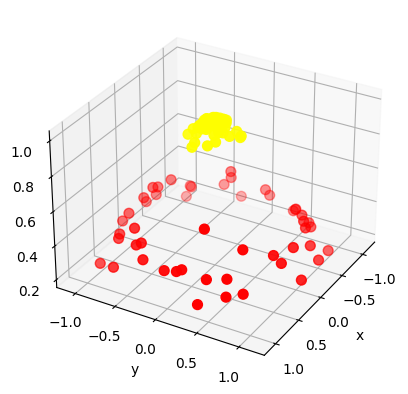

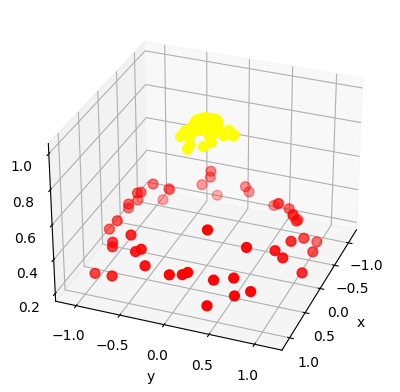

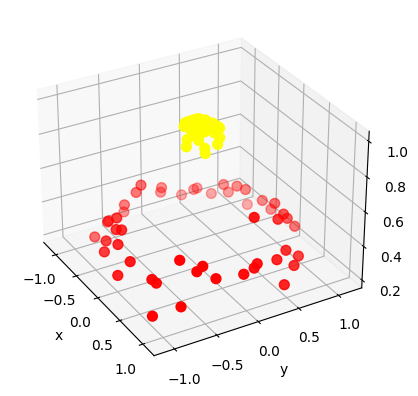

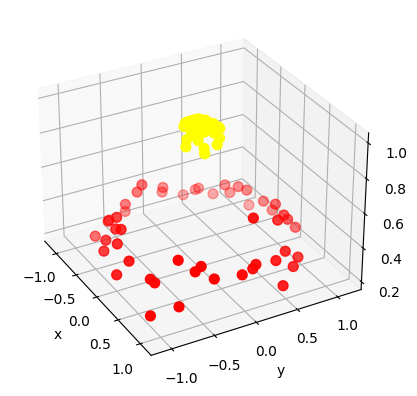

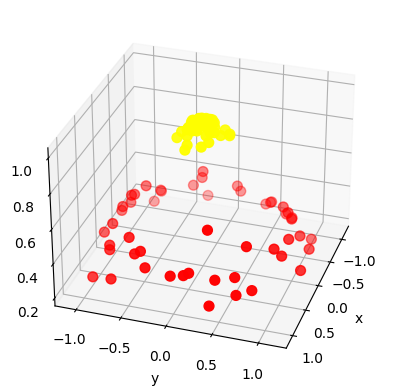

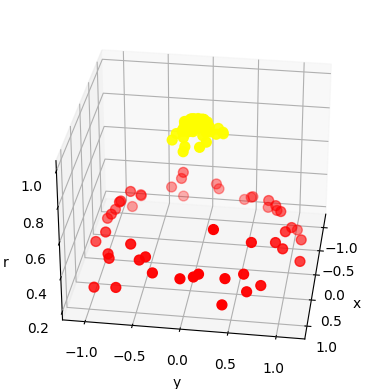

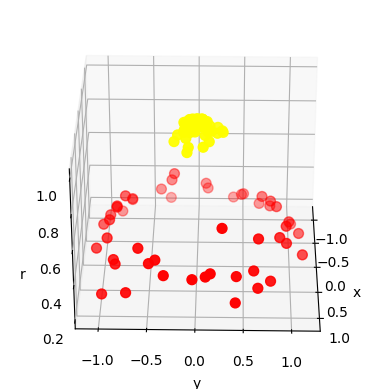

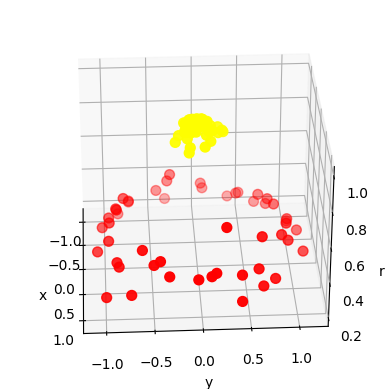

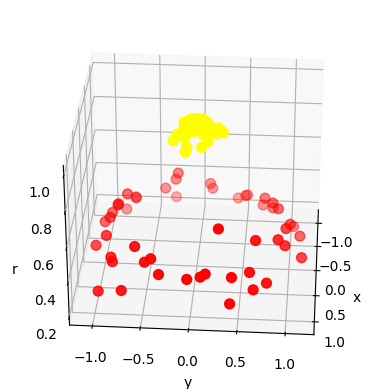

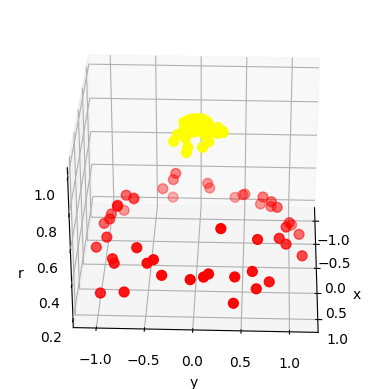

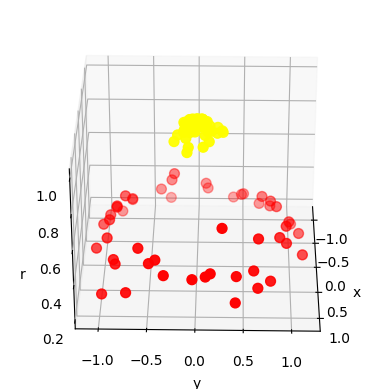

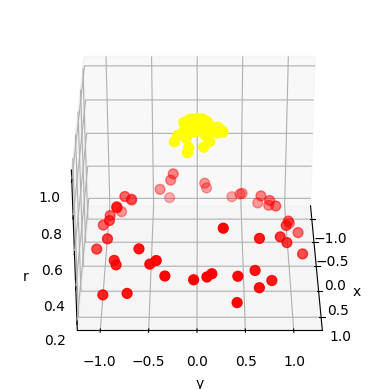

In [13]:
r = np.exp(-(X ** 2).sum(1))

from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [16]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

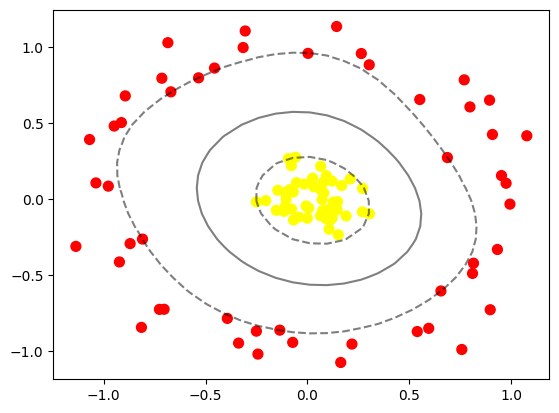

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

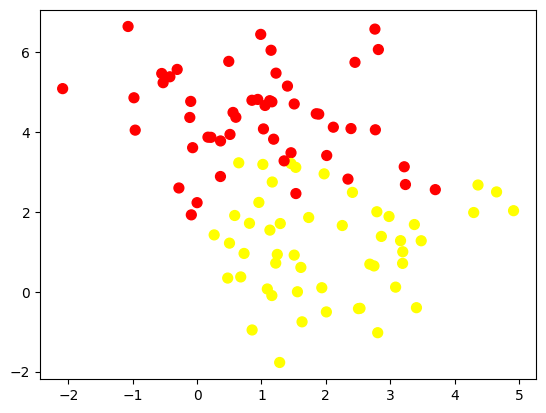

In [18]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

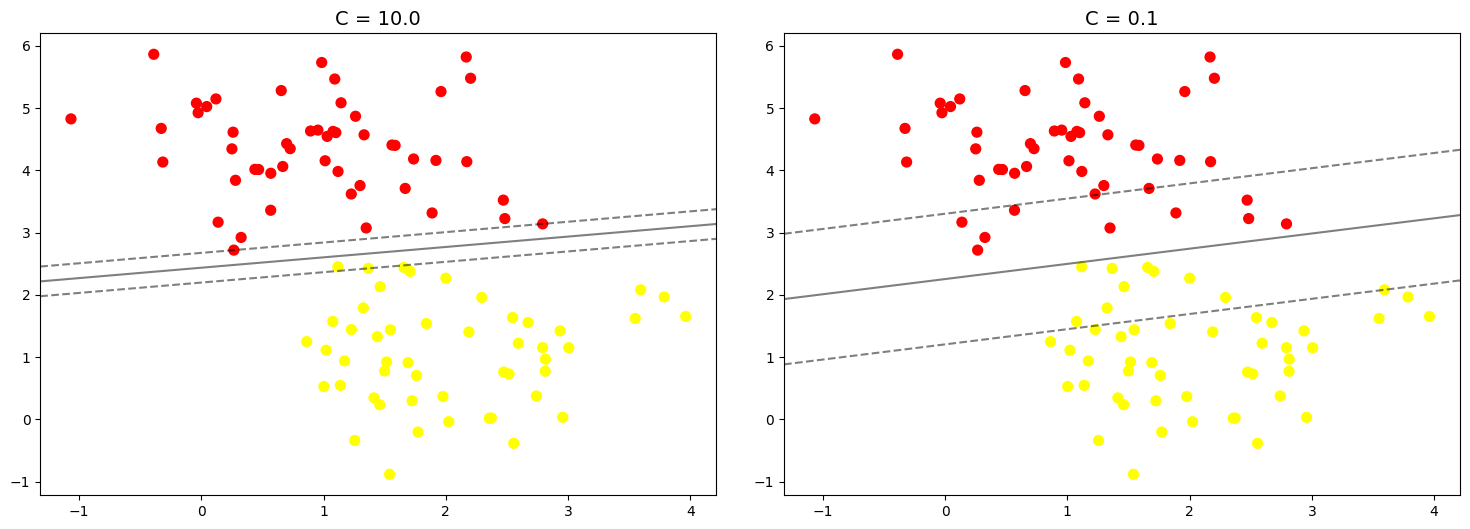

In [19]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)